In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read Dataset
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Splitting of Data into features and target
X = data.drop('0',axis = 1)
y = data['0']

In [6]:
#train_test_split on X and y
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
x_train.shape

(297960, 784)

In [8]:
#Reshaping the Training and Testing data
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


In [9]:
shuffle_data = shuffle(x_train)   #Shuffle the training data

In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


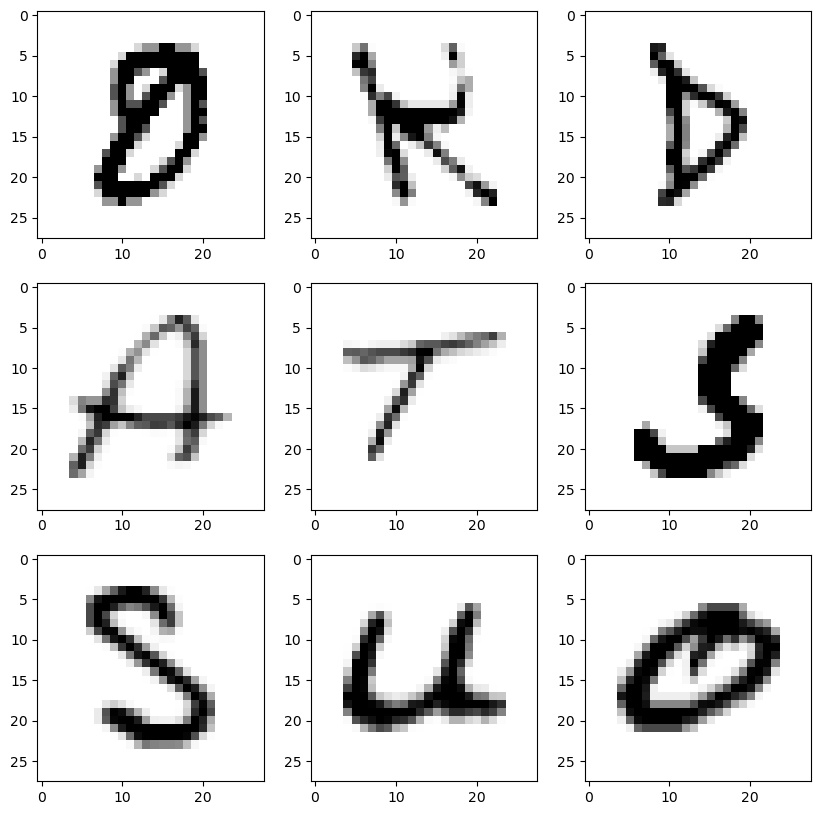

In [11]:
#Visualize our training data
import cv2
fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [12]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_training = to_categorical(y_train, num_classes = 26)
y_testing = to_categorical(y_test, num_classes = 26)

In [13]:
#Convolutional Neural Networks (CNN) model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam

In [14]:
model = Sequential()
 
model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))
 
model.add(Flatten())
 
model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

C:\Users\RAMA HARSHITA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,522 (478.60 KB)

 Trainable params: 122,522 (478.60 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 125s 13ms/step - accuracy: 0.8786 - loss: 0.4394 - val_accuracy: 0.9648 - val_loss: 0.1251
Epoch 2/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 129s 14ms/step - accuracy: 0.9652 - loss: 0.1211 - val_accuracy: 0.9686 - val_loss: 0.1093
Epoch 3/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 135s 15ms/step - accuracy: 0.9711 - loss: 0.1024 - val_accuracy: 0.9705 - val_loss: 0.1157
Epoch 4/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 129s 14ms/step - accuracy: 0.9744 - loss: 0.0938 - val_accuracy: 0.9700 - val_loss: 0.1231
Epoch 5/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 125s 13ms/step - accuracy: 0.9766 - loss: 0.0863 - val_accuracy: 0.9730 - val_loss: 0.1035


In [17]:
model.save(r'handwritten_character_recog_model.keras')  #Save the model

In [18]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

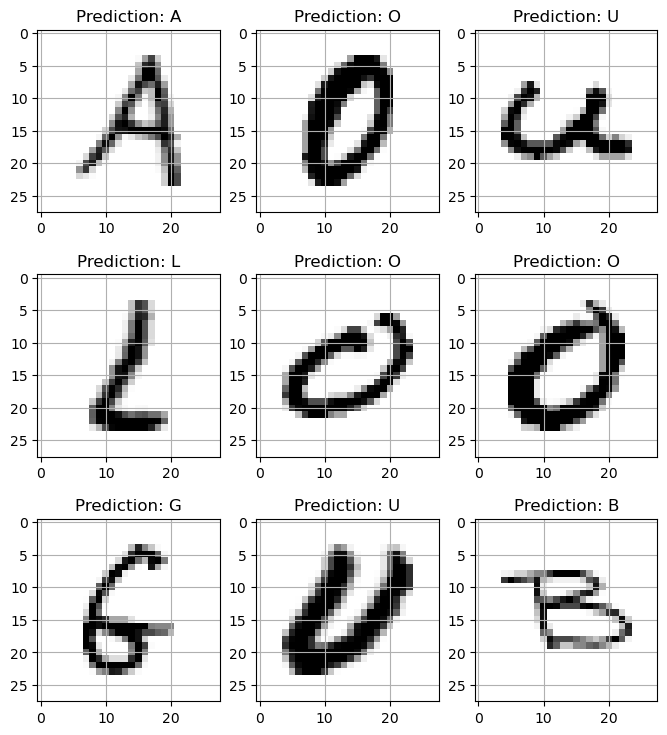

In [19]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [5]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
 
from keras.models import load_model
model = load_model('handwritten_character_recog_model.keras')
 
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
 
image = cv2.imread('J.png')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400,440))
 
image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
 
final_image = cv2.resize(img_thresh, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))
 
prediction = words[np.argmax(model.predict(final_image))]
 
cv2.putText(image, "Prediction: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))
cv2.imshow('Handwritten Alphabet Recognition ', image)
 
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
